# DataCamp - Project - Visualizing the History of Nobel Prize Winners

In [2]:
# load data folder
data_folder = "/Users/miguelbaptista/Library/CloudStorage/OneDrive-Personal/Data_Science/Python/MOOC/DataCamp/ficheiros_2/"

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from tqdm import tqdm

# 0) Load files

In [5]:
# load course files
nobel = pd.read_csv(data_folder + "nobel.csv")


The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.



The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the nobel.csv file in the data folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

Analyze Nobel Prize winner data and identify patterns by answering the following questions:

- What is the most commonly awarded gender and birth country?
Store your answers as string variables top_gender and top_country.

- Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?
Store this as an integer called max_decade_usa.

- Which decade and Nobel Prize category combination had the highest proportion of female laureates?
Store this as a dictionary called max_female_dict where the decade is the key and the category is the value. There should only be one key:value pair.

- Who was the first woman to receive a Nobel Prize, and in what category?
Save your string answers as first_woman_name and first_woman_category.

- Which individuals or organizations have won more than one Nobel Prize throughout the years?
Store the full names in a list named repeat_list.

In [8]:
print(nobel.shape)
nobel.head(3)

(1000, 18)


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany


## 1) What is the most commonly awarded gender and birth country?

Store your answers as string variables top_gender and top_country.

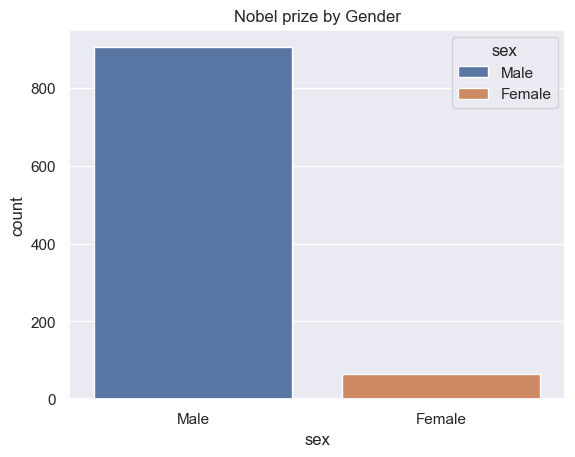

Male


In [11]:
# What is the most commonly awarded gender
sns.countplot(x="sex", data=nobel, hue="sex")
plt.title("Nobel prize by Gender")
plt.show()

top_gender = "Male"
print(top_gender)

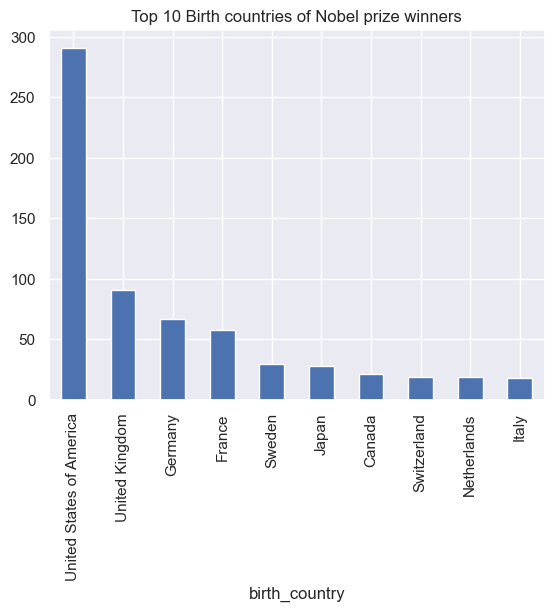

United States of America


In [12]:
# What is the most commonly awarded birth country?
nobel["birth_country"].value_counts()[:10].plot(kind="bar")
plt.title("Top 10 Birth countries of Nobel prize winners")
plt.show()

top_country = nobel["birth_country"].value_counts().index[0]
print(top_country)

## 2) Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

Store this as an integer called max_decade_usa.

In [15]:
nobel_us = nobel[nobel["birth_country"] == "United States of America"].reset_index(drop=True)
print("min", nobel_us.year.min())
print("max", nobel_us.year.max())

min 1906
max 2023


In [16]:
# build decades
decades = []
for i in [1901, 1911, 1921, 1931, 1941, 1951, 1961, 1971, 1981, 1991, 2001, 2011, 2021]:
    decades.append(list(range(i, i + 10)))

In [17]:
# USA ratios
us_ratios = []
for i in tqdm(list(range(0, 13))):
    df = nobel[nobel["year"].isin(decades[i])]
    len = df.shape[0]
    len_us = df[df["birth_country"] == "United States of America"].shape[0]
    us_ratio = round(len_us / len, 2)
    us_ratios.append((str(decades[i][0]) + " - " + str(decades[i][-1]), us_ratio))
    
us_ratios

100%|█████████████████████████████████████████| 13/13 [00:00<00:00, 2661.62it/s]


[('1901 - 1910', 0.02),
 ('1911 - 1920', 0.07),
 ('1921 - 1930', 0.09),
 ('1931 - 1940', 0.25),
 ('1941 - 1950', 0.31),
 ('1951 - 1960', 0.29),
 ('1961 - 1970', 0.27),
 ('1971 - 1980', 0.34),
 ('1981 - 1990', 0.34),
 ('1991 - 2000', 0.37),
 ('2001 - 2010', 0.41),
 ('2011 - 2020', 0.34),
 ('2021 - 2030', 0.29)]

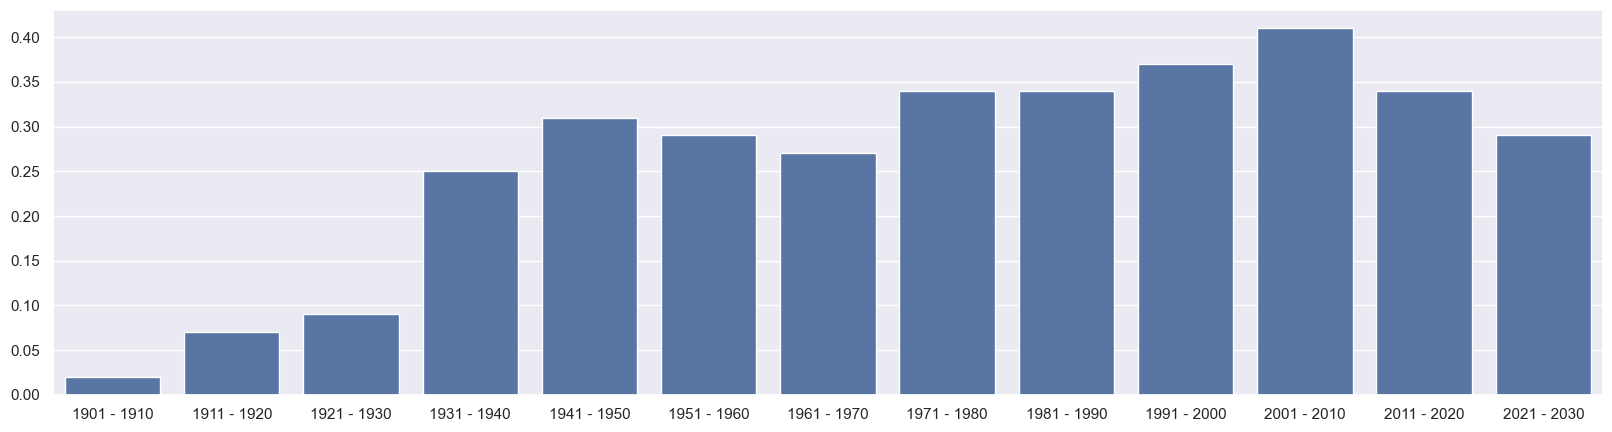

In [18]:
# plot lists
decades = [i[0] for i in us_ratios]
ratios = [i[1] for i in us_ratios]

plt.subplots(figsize=[20, 5])
sns.barplot(x=decades, y=ratios)
plt.show()

In [19]:
# answer
max_decade_usa = 2000

## 3) Which decade and Nobel Prize category combination had the highest proportion of female laureates?

Store this as a dictionary called max_female_dict where the decade is the key and the category is the value. There should only be one key:value pair.

In [22]:
# build decades
decades = []
for i in [1901, 1911, 1921, 1931, 1941, 1951, 1961, 1971, 1981, 1991, 2001, 2011, 2021]:
    decades.append(list(range(i, i + 10)))

In [23]:
# Female ratios
category_femaleprop = []
for i in tqdm(list(range(0, 13))):
    # decade df
    df = nobel[nobel["year"].isin(decades[i])]
    
    # categories
    for category in df["category"].unique():
        df_ct = df[df["category"] == category]
        if "Female" in df_ct["sex"].value_counts().index:
            count_female = df_ct["sex"].value_counts()["Female"]
            if "Male" in df_ct["sex"].value_counts().index:
                count_male = df_ct["sex"].value_counts()["Male"]
            else:
                count_male = 0
            prop_female = round(count_female / (count_female + count_male), 2)
            category_femaleprop.append([decades[i][0], category, prop_female])
    
category_femaleprop

100%|██████████████████████████████████████████| 13/13 [00:00<00:00, 538.91it/s]


[[1901, 'Literature', 0.09],
 [1901, 'Peace', 0.08],
 [1901, 'Physics', 0.07],
 [1911, 'Chemistry', 0.12],
 [1921, 'Literature', 0.2],
 [1931, 'Chemistry', 0.08],
 [1931, 'Literature', 0.12],
 [1931, 'Peace', 0.14],
 [1941, 'Medicine', 0.06],
 [1941, 'Literature', 0.14],
 [1941, 'Peace', 0.2],
 [1961, 'Chemistry', 0.07],
 [1961, 'Literature', 0.09],
 [1961, 'Physics', 0.06],
 [1971, 'Medicine', 0.04],
 [1971, 'Peace', 0.25],
 [1981, 'Medicine', 0.14],
 [1981, 'Peace', 0.12],
 [1991, 'Literature', 0.3],
 [1991, 'Medicine', 0.05],
 [1991, 'Peace', 0.21],
 [2001, 'Chemistry', 0.04],
 [2001, 'Economics', 0.05],
 [2001, 'Literature', 0.3],
 [2001, 'Medicine', 0.17],
 [2001, 'Peace', 0.2],
 [2011, 'Chemistry', 0.12],
 [2011, 'Economics', 0.05],
 [2011, 'Literature', 0.4],
 [2011, 'Medicine', 0.08],
 [2011, 'Peace', 0.56],
 [2011, 'Physics', 0.07],
 [2021, 'Medicine', 0.2],
 [2021, 'Physics', 0.11],
 [2021, 'Chemistry', 0.12],
 [2021, 'Literature', 0.33],
 [2021, 'Peace', 0.5],
 [2021, 'Econo

In [24]:
# decade, category in highest female proportion
highest_prop_fem = category_femaleprop[np.argmax([i[2] for ind, i in enumerate(category_femaleprop)])]
highest_prop_fem

[2011, 'Peace', 0.56]

In [25]:
# Solution
max_female_dict = {"2010": highest_prop_fem[1]}
max_female_dict

{'2010': 'Peace'}

## 4) Who was the first woman to receive a Nobel Prize, and in what category?

Save your string answers as first_woman_name and first_woman_category.

In [28]:
first_woman_nobel = nobel[nobel["sex"]=="Female"].iloc[0]
first_woman_nobel

year                                                                 1903
category                                                          Physics
prize                                     The Nobel Prize in Physics 1903
motivation              "in recognition of the extraordinary services ...
prize_share                                                           1/4
laureate_id                                                             6
laureate_type                                                  Individual
full_name                                     Marie Curie, née Sklodowska
birth_date                                                     1867-11-07
birth_city                                                         Warsaw
birth_country                                     Russian Empire (Poland)
sex                                                                Female
organization_name                                                     NaN
organization_city                     

In [29]:
# solutions
first_woman_name = first_woman_nobel["full_name"]
first_woman_category = first_woman_nobel["category"]

print(first_woman_name, "-->", first_woman_category)

Marie Curie, née Sklodowska --> Physics


## 5) Which individuals or organizations have won more than one Nobel Prize throughout the years?

Store the full names in a list named repeat_list.

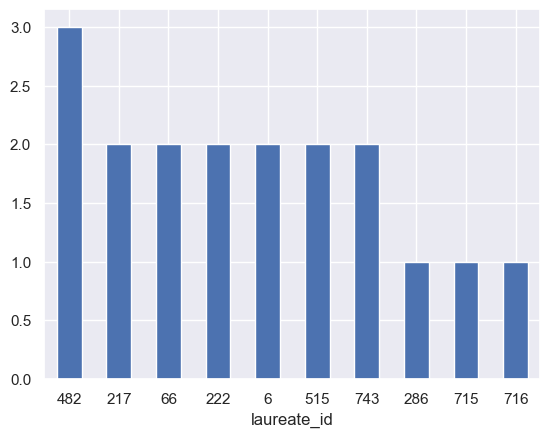

In [32]:
# plot
nobel["laureate_id"].value_counts()[:10].plot(kind="bar")
plt.xticks(rotation=0)
plt.show()

In [33]:
# build df where count nobel > 1
df = pd.DataFrame(nobel["laureate_id"].value_counts())
winners_id = list(df[df["count"]>1].index)
winners_id

[482, 217, 66, 222, 6, 515, 743]

In [34]:
# winners
df_winners = nobel[nobel["laureate_id"].isin(winners_id)]
list(df_winners["full_name"].unique())

['Marie Curie, née Sklodowska',
 'Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)',
 'John Bardeen',
 'Frederick Sanger',
 'K. Barry Sharpless',
 'Barry Sharpless']

In [35]:
repeat_list = []

for i in winners_id:
    name = nobel[nobel["laureate_id"]==i]["full_name"].values[0]
    if name not in repeat_list:
        repeat_list.append(name)

repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)',
 'K. Barry Sharpless']

# Solutions


 The gender with the most Nobel laureates is : Male
 The most common birth country of Nobel laureates is : United States of America

 The first woman to win a Nobel Prize was Marie Curie, née Sklodowska, in the category of Physics.

 The repeat winners are : ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']


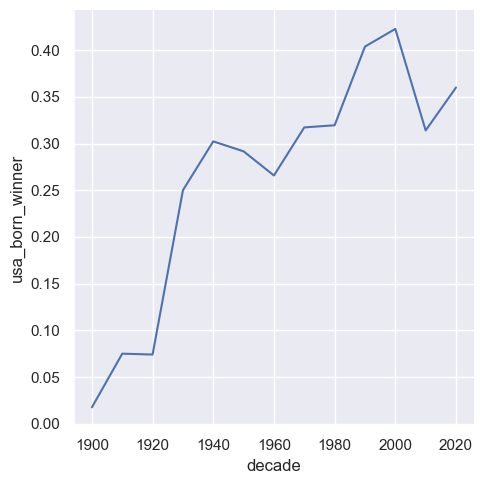

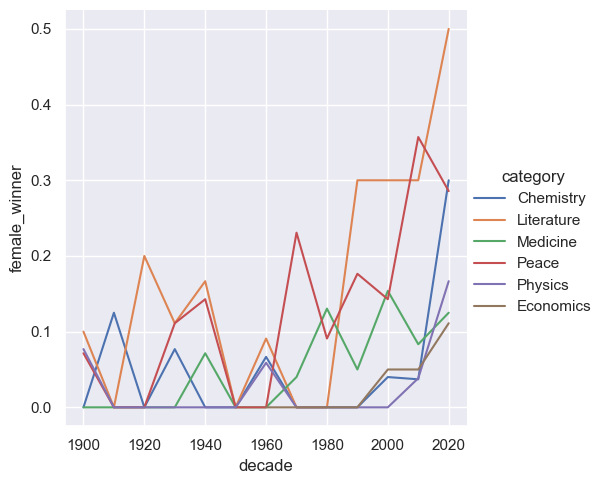

In [37]:
# Store and display the most commonly awarded gender and birth country in requested variables
top_gender = nobel['sex'].value_counts().index[0]
top_country = nobel['birth_country'].value_counts().index[0]

print("\n The gender with the most Nobel laureates is :", top_gender)
print(" The most common birth country of Nobel laureates is :", top_country)

# Calculate the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].mean()

# Identify the decade with the highest proportion of US-born winners
max_decade_usa = prop_usa_winners[prop_usa_winners['usa_born_winner'] == prop_usa_winners['usa_born_winner'].max()]['decade'].values[0]

# Optional: Plotting USA born winners
ax1 = sns.relplot(x='decade', y='usa_born_winner', data=prop_usa_winners, kind="line")

# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel['sex'] == 'Female'
prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

# Find the decade and category with the highest proportion of female laureates
max_female_decade_category = prop_female_winners[prop_female_winners['female_winner'] == prop_female_winners['female_winner'].max()][['decade', 'category']]

# Create a dictionary with the decade and category pair
max_female_dict = {max_female_decade_category['decade'].values[0]: max_female_decade_category['category'].values[0]}

# Optional: Plotting female winners with % winners on the y-axis
ax2 = sns.relplot(x='decade', y='female_winner', hue='category', data=prop_female_winners, kind="line")

# Finding the first woman to win a Nobel Prize
nobel_women = nobel[nobel['female_winner']]
min_row = nobel_women[nobel_women['year'] == nobel_women['year'].min()]
first_woman_name = min_row['full_name'].values[0]
first_woman_category = min_row['category'].values[0]
print(f"\n The first woman to win a Nobel Prize was {first_woman_name}, in the category of {first_woman_category}.")

# Selecting the laureates that have received 2 or more prizes
counts = nobel['full_name'].value_counts()
repeats = counts[counts >= 2].index
repeat_list = list(repeats)

print("\n The repeat winners are :", repeat_list)